In [19]:
import matplotlib.pyplot as plt
import mysolver as solver
import numpy as np

Damped Osc

In [20]:
def oscillator(t,y,K,M,L):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the input values
        :param K: the spring constant
        :param M: the mass of the oscillator
        :param L: the damping constant
        :param args: extra parameters, here args=(K,M,L) 

        """
        
        yder = np.zeros(len(y))
        yder[0] = y[1]
        yder[1] = -2*(L/(2*M))*y[1]+(-K/M)*y[0]

        return yder

(i) 
A = 0.01(m) ; omega_0 = 1 ; gamma = 0.2 ; phi = -pi/2

In [21]:
#B.C.
A= 0.01
K = 1 
M = 1 
phi = -np.pi/2
gamma = 0.2
L = gamma*2*M
omega0 = 1
omega1=np.sqrt(abs(gamma**2-omega0**2))

t_span = (0, 20)
y0     = np.array([0,A*omega1])
t_eval = np.linspace(0,20,1000)

In [22]:
sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L))

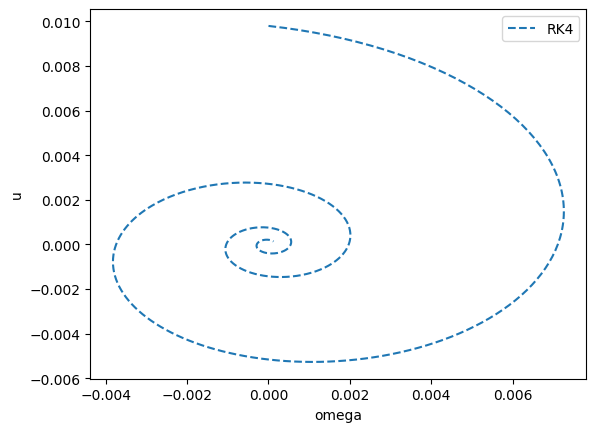

In [23]:
plt.figure(1)
plt.plot(omega1*sol_rk4[0],gamma*sol_rk4[0]+sol_rk4[1],'--',label="RK4",markersize=3)
plt.xlabel('omega')
plt.ylabel('u')
plt.legend()

(ii)
A = 0.01(m) ; omega_0 = 1 ; gamma = 1.0 ; phi = -pi/2

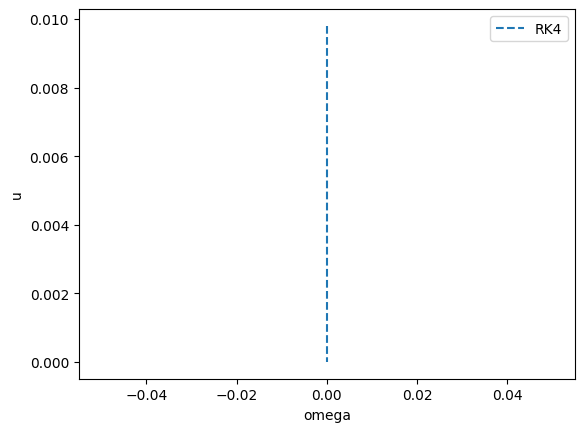

In [24]:
gamma = 1
L = gamma*2*M
omega1=np.sqrt(abs(gamma**2-omega0**2))

sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L))
plt.figure(1)
plt.plot(omega1*sol_rk4[0],gamma*sol_rk4[0]+sol_rk4[1],'--',label="RK4",markersize=3)
plt.xlabel('omega')
plt.ylabel('u')
plt.legend()

(iii) A = 0.01(m) ; omega_0 = 1 ; gamma = 1.2 ; phi = -pi/2

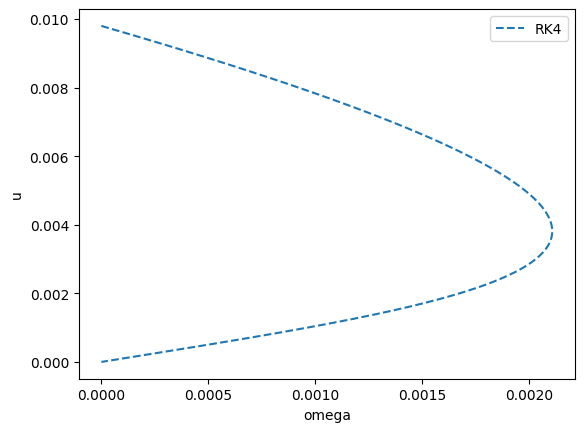

In [25]:
gamma = 1.2
L = gamma*2*M
omega1=np.sqrt(abs(gamma**2-omega0**2))
sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L))

plt.figure(1)
plt.plot(omega1*sol_rk4[0],gamma*sol_rk4[0]+sol_rk4[1],'--',label="RK4",markersize=3)
plt.xlabel('omega')
plt.ylabel('u')
plt.legend()

Total energy

In [26]:
gamma = 0.2
L = gamma*2*M
omega1=np.sqrt(abs(gamma**2-omega0**2))
sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L))

In [27]:
Ek = 0.5*M*(sol_rk4[1]**2)
U = 0.5*K*(sol_rk4[0]**2)
ET = Ek+U

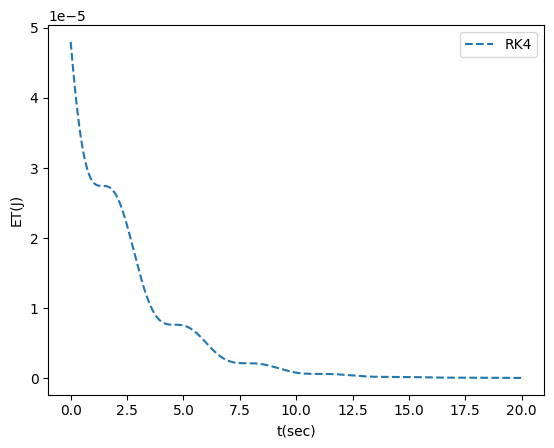

In [28]:
plt.figure(1)
plt.plot(t_eval,ET,'--',label="RK4",markersize=3)
plt.xlabel('t(sec)')
plt.ylabel('ET(J)')
plt.legend()

Energy loss rate

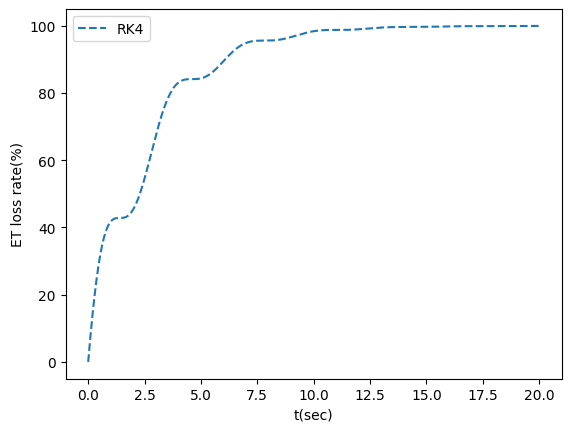

In [29]:
ET_loss = ((ET[0]-ET)/ET[0])*100
plt.figure(1)
plt.plot(t_eval,ET_loss,'--',label="RK4",markersize=3)
plt.xlabel('t(sec)')
plt.ylabel('ET loss rate(%)')
plt.legend()

#x : time
#y : percentage

Forced Osc - Resonance

In [30]:
def oscillator(t,y,K,M,L,F0,wf):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the input values
        :param K: the spring constant
        :param M: the mass of the oscillator

        """
        yder = np.zeros(len(y))
        yder[0] = y[1]
        yder[1] = (F0/M)*np.cos(wf*t)-(L/M)*y[1]-(K/M)*y[0]
        return yder

In [31]:
F0 = 0.5
wf = 0.5
t_span = (0, 50)
y0     = np.array([0,A])
t_eval = np.linspace(0,50,1000)
sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L,F0,wf))





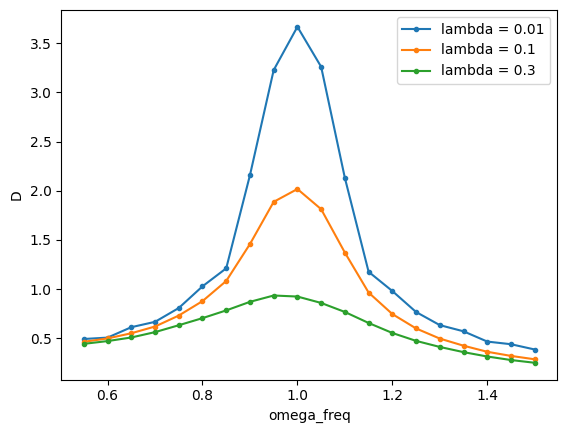

In [37]:
wf_ay=np.zeros(20)
wf=0.5
D_1 = np.zeros(20)
D_2 = np.zeros(20)
D_3 = np.zeros(20)

for i in range(20):
    wf +=0.05
    wf_ay[i]=wf
    L=0.01
    sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L,F0,wf))
    D_1[i]=np.sum(abs(sol_rk4[0]))/1000
    L=0.1
    sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L,F0,wf))
    D_2[i]=np.sum(abs(sol_rk4[0]))/1000
    L=0.3
    sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L,F0,wf))
    D_3[i]=np.sum(abs(sol_rk4[0]))/1000


plt.figure(1)
plt.plot(wf_ay,D_1,'-o',label="lambda = 0.01",markersize=3)
plt.plot(wf_ay,D_2,'-o',label="lambda = 0.1",markersize=3)
plt.plot(wf_ay,D_3,'-o',label="lambda = 0.3",markersize=3)

plt.xlabel('omega_freq')
plt.ylabel('D')
plt.legend()

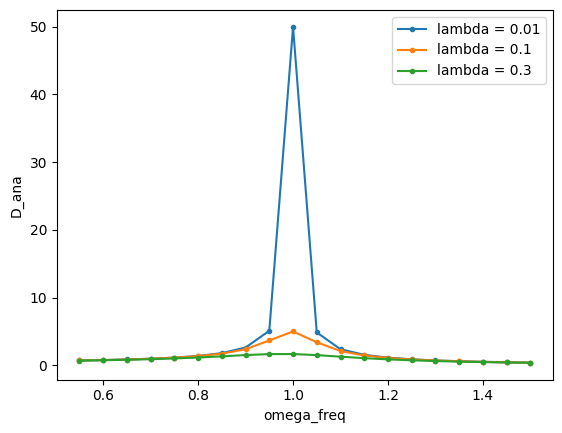

In [38]:
D_ana_1 = np.zeros(20)
D_ana_2 = np.zeros(20)
D_ana_3 = np.zeros(20)
wf_ay=np.zeros(20)
wf=0.5

for i in range(20):
    wf +=0.05
    wf_ay[i]=wf
    L=0.01
    D_ana_1[i]=(F0/M)/(np.sqrt((omega0**2-wf**2)**2+4*(wf**2)*(L/(2*M))**2))
    L=0.1
    D_ana_2[i]=(F0/M)/(np.sqrt((omega0**2-wf**2)**2+4*(wf**2)*(L/(2*M))**2))
    L=0.3
    D_ana_3[i]=(F0/M)/(np.sqrt((omega0**2-wf**2)**2+4*(wf**2)*(L/(2*M))**2))

plt.figure(1)
plt.plot(wf_ay,D_ana_1,'-o',label="lambda = 0.01",markersize=3)
plt.plot(wf_ay,D_ana_2,'-o',label="lambda = 0.1",markersize=3)
plt.plot(wf_ay,D_ana_3,'-o',label="lambda = 0.3",markersize=3)
plt.xlabel('omega_freq')
plt.ylabel('D_ana')
plt.legend()

RLC circuit

In [34]:
def oscillator(t,y,C,L,R,E0,wf):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = q
        y[1] = I

        yderive[0] = q'
        yderive[1] = q''
        :param t: the time
        :param y: the input values
        :param 1/C: the spring constant
        :param L: the mass of the oscillator
        :param R : the damped constant

        """
        yder = np.zeros(len(y))
        yder[0] = y[1]
        yder[1] = (E0/L)*np.sin(wf*t)-(R/L)*y[1]-(1/(C*L))*y[0]
        return yder

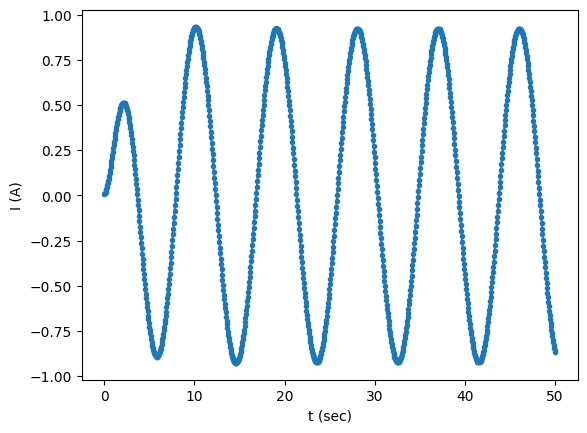

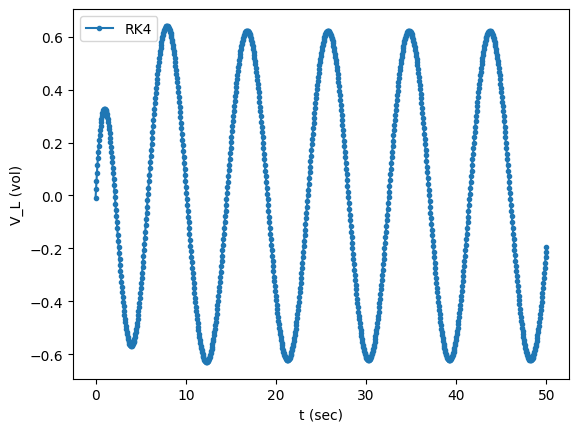

In [35]:
L = 1 
C = 1
E0 = 1  
R = 0.8
omega0 = 1/np.sqrt(L*C)
gamma = R/(2*L)
wf = 0.7
t_span = (0, 50)
y0     = np.array([0,A])
t_eval = np.linspace(0,50,1000)
sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(C,L,R,E0,wf))
#I = (dq/dt)
plt.figure(1)
plt.plot(t_eval,sol_rk4[1],'-o',label="RK4",markersize=3)
plt.xlabel('t (sec)')
plt.ylabel('I (A)')
#V_L = L*(dL/dt)
plt.figure(2)
plt.plot(t_eval,E0*np.sin(wf*t_eval)-R*sol_rk4[1]-(1/(C))*sol_rk4[0],'-o',label="RK4",markersize=3)
plt.xlabel('t (sec)')
plt.ylabel('V_L (vol)')
plt.legend()

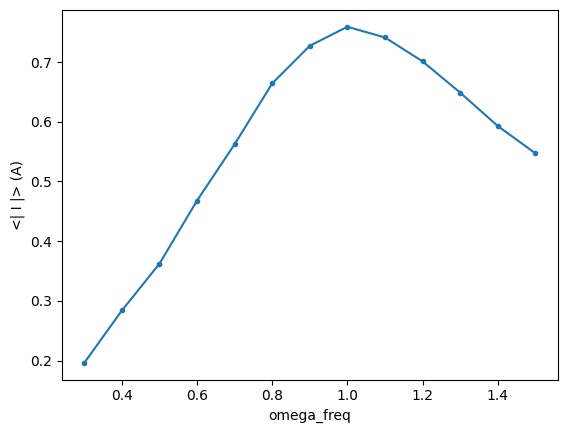

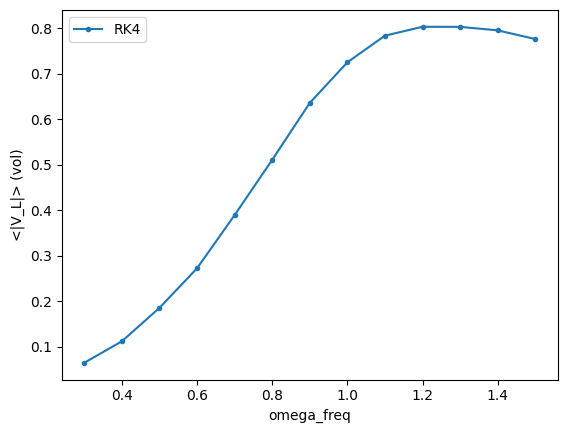

In [36]:
wf_ay=np.zeros(13)
wf=0.2
I_max = np.zeros(13)
V_L_max = np.zeros(13)
D_3 = np.zeros(13)

for i in range(13):
    wf +=0.1
    wf_ay[i]=wf
    sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(C,L,R,E0,wf))
    I_max[i]=np.sum(abs(sol_rk4[1]))/1000
    V_L_max[i]=np.sum(abs(E0*np.sin(wf*t_eval)-R*sol_rk4[1]-(1/(C))*sol_rk4[0]))/1000

#I = (dq/dt)
plt.figure(1)
plt.plot(wf_ay,I_max,'-o',label="RK4",markersize=3)
plt.xlabel('omega_freq')
plt.ylabel('<| I |> (A)')
#V_L = L*(dL/dt)
plt.figure(2)
plt.plot(wf_ay,V_L_max,'-o',label="RK4",markersize=3)
plt.xlabel('omega_freq')
plt.ylabel('<|V_L|> (vol)')
plt.legend()
